<h2>RELATÓRIO ENTREGA 2</h2>
<h5>Entregue à disciplina Introdução à Ciência de Dados - DCC UFMG - Segundo semestre de 2025, Belo Horizonte</h5>

**Integrantes:**<br>
<font size="3">
    <ul>
        <li>**Daniel Costa** (2024006064)</li>
        <li>**Isaac Reyes** (2025050342)</li>
        <li>**João Araldi** (2024005475)</li>
        <li>**Pedro Luiz** (2024006129)</li>
    </ul>
</font><hr>

**I. Introdução e contexto:**<br>
O relatório detalha as etapas da análise exploratória de dados e a aplicação de Testes de Hipótese e Intervalos de Confiança sobre o dataset dos jogos da Premier League 2019-2025.<br> O Objetivo central do projeto é utilizar a análise estatística para extrair informações sobre o desempenho das equipes, o fator casa e a relação das odds das casas de apostas com os resultados finais das partidas.

**II. Descrição da Análisa Exploratória**<br>
Linha de pensamento durante o Processo:<br>
 - A Análise começou com a verificação da consistẽncia do dataset, que contem 2452 partidas e 53 colunas. Foi identificado uma pequena quantidade de valores faltantes (10), o que mostra uma robustez na coleta dos dados do dataset. Esses valores estavam nas colunas de odds de gols (P>2.5 e P<2.5), que, conforme o plano, foram ignoradas por não apresentarem risco aos estudos.<br>

 - No trabalho, as odds foram convertidas em probabilidades normalizadas: <br>     As odds são a forma como as casas de apostas expressam a probabilidade de um evento ocorrer, mas invertida.A fórmula para converter uma odd ($O$) em uma probabilidade implícita ($P$) é:$$\text{Probabilidade Implícita} (P) = \frac{1}{\text{Odd} (O)}$$<br>
 A soma das probabilidades implícitas de todos os resultados possíveis (vitória da casa, empate, vitória do visitante) em uma casa de apostas nunca será 100% (ou 1.0). Ela será sempre maior que 100%.$$\text{Soma Total} = P_{\text{Casa}} + P_{\text{Empate}} + P_{\text{Fora}} > 1.0$$Essa diferença acima de 1.0 é a margem de lucro da casa de apostas, ou overround. Para análises estatísticas e modelagem, é necessário que as probabilidades se somem a 1.0, simulando um mercado "justo" sem a margem da casa.<br>
 A normalização é o processo de ajustar essas probabilidades implícitas para que a soma delas seja exatamente 1.0 (ou 100%). $$\text{Probabilidade Normalizada} = \frac{P_{\text{Resultado}}}{\sum P_{\text{Total}}}$$ O resultado final são as colunas B365H_prob_norm, B365D_prob_norm, B365A_prob_norm, etc. Essas são as probabilidades que seu modelo estatístico utilizará, representando a chance real de cada resultado ocorrer, excluindo a margem da casa de apostas.
 - Foram criadas features cruciais para a análise, como Goal_Diff_Home (diferença de gols: mandante - visitante) e Home_Win (variável binária para vitória do mandante). Além disso, foram calculados os pontos acumulados (Home_CumPoints, Away_CumPoints) e o momentum dos times (Home_Streak, Away_Streak) com base nas últimas partidas, incluindo métricas de ataque/defesa (razão GF/GA).
 <br><br> **A etapa seguinte focou na visualização das distribuições de gols e fator casa**

**III Efeito das Variáveis Dependentes** 

 - Pergunta: Qual a distribuição e o impacto do Fator Casa em gols?
   - A mediana de gols para ambos os times é de aproximadamente 1 gol.
   - As distribuições são assimétricas, concentradas em valores baixos, com a maioria dos jogos terminando com 0 a 3 gols.
   - O time mandante possui uma média de 1.53 gols, enquanto o visitante possui de 1.24 gols, sugerindo uma leve vantagem do mandante. <br><br>
    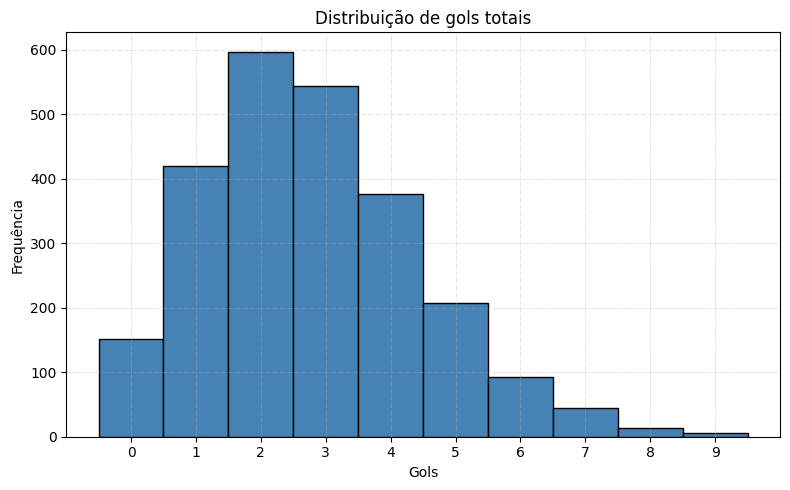&emsp;&emsp;&emsp;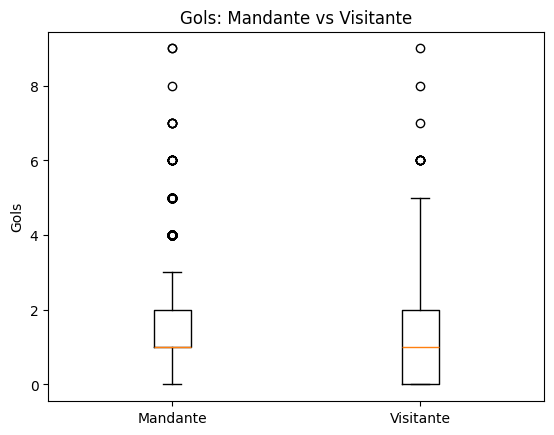<br><br>
   - Fator casa: A frequência de vitórias dos mandantes é de 44,5%
   - A diferença média de gols é de 0.29
   - O grafico da boxplot da Goal_Diff_Home mostra claramente a vantagem do time da casa, com a mediana das vitórias fora de casa sendo de -2 gols e a das vitórias em casa sendo de 2 gols. A mediana dos empates é 0, como esperado.
   - A média de gols por jogo oscila, mas se mantem geralmente acima de 2.7 gols por jogo, subindo constantemente ao longo das temporadas.<br><br>
 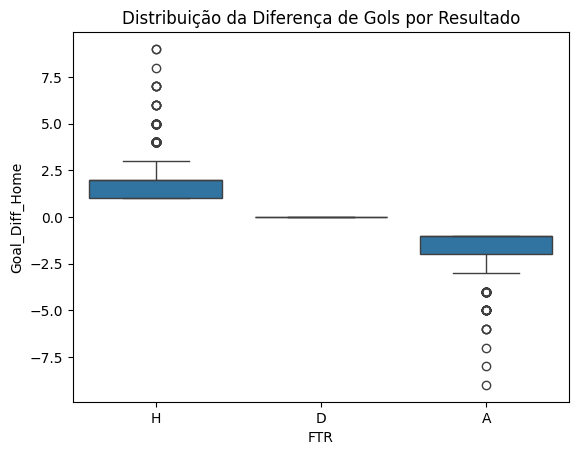&emsp;&emsp;&emsp;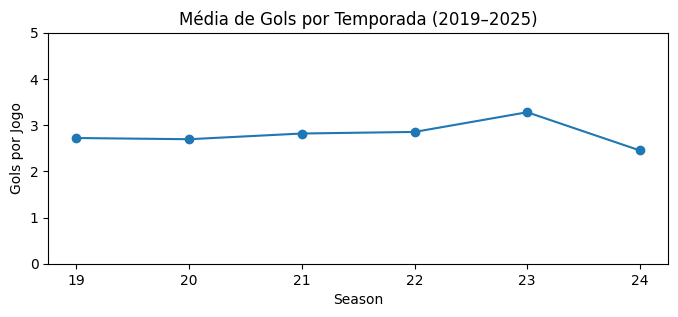 <br> <br>
   - Os times mandantes demonstram uma média ligeiramente maior de chutes a gol (13.78 vs. 11.28) e chutes a gol no alvo (4.72 vs. 3.94), confirmando que a vantagem de jogar em casa se reflete na agressividade ofensiva.

**IV Testes de Hipótese e Intervalos de Confiança** <br>
Esta seção detalha o plano, as Hipóteses Nulas (H0) e os resultados estatístico dos quatro testes conduzidos.
 - **1. Teste de Proporção: taxa de Sucesso dos Favoritos.**
   - O objetivo deste teste foi verificar se a taxa de vitória dos times favoritos (definidos pela menor odd pré-jogo) na Premier League é compatível com a referência teórica de **70%**. <br>

   **Hipótese Nula ($H_0$):** A proporção de vitórias dos favoritos é maior ou igual a 70% ($\pi \ge 0.70$). <br>
   **Hipótese Alternativa ($H_1$):** A proporção de vitórias dos favoritos é inferior a 70% ($\pi < 0.70$), sinalizando falhas relevantes nas expectativas das casas.
   - <font size=2 >A referência de **70%** para a taxa de sucesso dos favoritos é comumente citada em literatura de apostas esportivas e análises de mercado de odds. Essa taxa reflete a expectativa de que, em ligas competitivas de futebol, o favorito (definido pelas menores odds) deveria vencer cerca de 7 em cada 10 partidas para que as casas de apostas mantenham margens de lucro consistentes e os apostadores profissionais consigam identificar valor.</font><br>  
   **Modus operandis:**
  - Utilizou-se um Teste Z para proporção única, adequado para amostras grandes; Partidas onde houve empate na odd mínima (23) foram removidas para definir um favorito claro.<br>
  - Nível de significância $\alpha = 0.05$, com a hipótese alternativa "smaller" para testar se a proporção observada é menor que 0.7.<br><br>
  **Proporção Observada ($\hat{\pi}$):** 53.9% <br><br>
**Intervalo de Confiança (95%):** [51.9%, 55.9%] <br><br>
**Estatística Z:** -15.839 <br><br>
**P-valor (Unicaudal):** 0.00000 <br><br>
**Decisão:** **Rejeitar $H_0$**
 - **Conclusão:** O teste Z rejeitou categoricamente a hipótese nula. A taxa real de sucesso dos favoritos na Premier League está em torno de 54%, significativamente abaixo da referência de 70%, o que confirma a alta competitividade e imprevisibilidade da liga inglesa. Esta taxa empírica deve ser o novo baseline de sucesso para análises futuras.
